# Ejemplo con dataset de flores para Agrupación aglomerativa

In [23]:
# Importar las librerías necesarias
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [24]:
# Cargar el dataset de flores Iris
iris = load_iris()

# Extraer los datos
iris_data = iris.data

# Creamos dataframe para mejor visualización
df_iris = pd.DataFrame(iris_data, columns=iris.feature_names)
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [25]:
# Extraemos solo las características del pétalo
datos_petalos = df_iris.iloc[:, 2:4]
datos_petalos

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [26]:
# Tipos de flores en el dataset (setosa, versicolor, virginica)
iris.target_names 

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

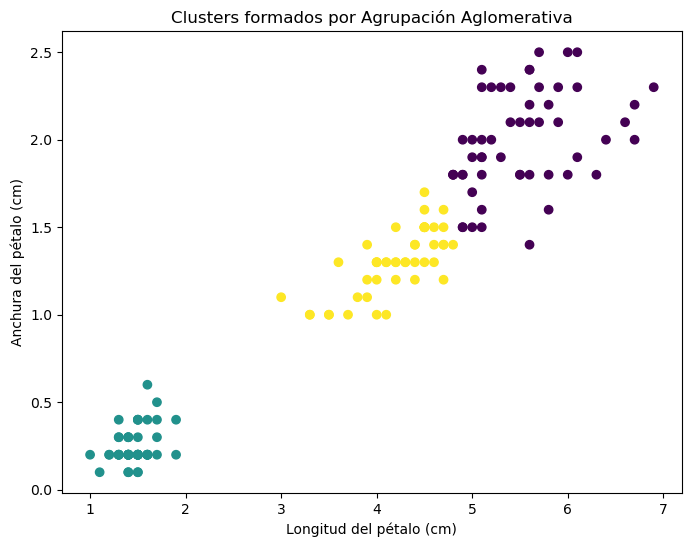

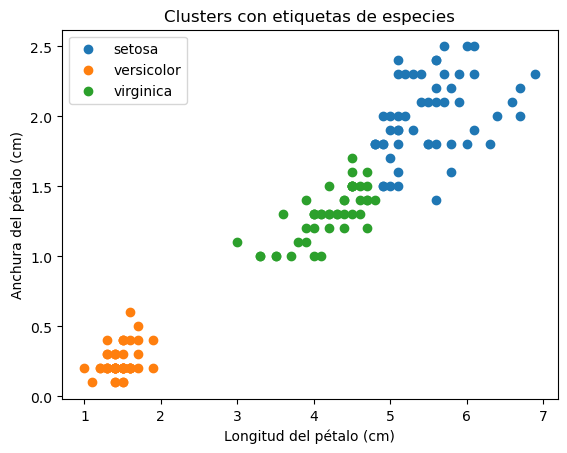

In [27]:
# Agrupación aglomerativa
agglomerative = AgglomerativeClustering(n_clusters=3, linkage='ward')
agglomerative.fit(datos_petalos)
labels = agglomerative.labels_

# Visualización de los clusters formados
plt.figure(figsize=(8, 6))
plt.scatter(datos_petalos.iloc[:, 0], datos_petalos.iloc[:, 1], c=labels, cmap='viridis')
plt.title('Clusters formados por Agrupación Aglomerativa')
plt.xlabel('Longitud del pétalo (cm)')
plt.ylabel('Anchura del pétalo (cm)')
plt.show()

# Añadir etiquetas de la especie a cada cluster en el gráfico (setosa, versicolor, virginica)
for i in range(3):
    plt.scatter(datos_petalos.iloc[labels == i, 0], datos_petalos.iloc[labels == i, 1], label=iris.target_names[i])
plt.legend()
# Añadir etiquetas a los ejes y título
plt.title('Clusters con etiquetas de especies')
plt.xlabel('Longitud del pétalo (cm)')
plt.ylabel('Anchura del pétalo (cm)')
plt.show()

### YO JUGANDO EN 3D

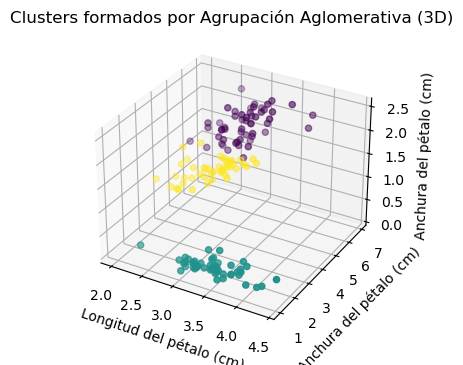

In [28]:
# Representar en 3D los clusters con las 3 primeras columnas del dataset
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(111, projection='3d')
# Usar las tres primeras características para el gráfico 3D
ax.scatter(iris_data[:, 1], iris_data[:, 2], iris_data[:, 3], c=labels, cmap='viridis')
ax.set_title('Clusters formados por Agrupación Aglomerativa (3D)')
ax.set_xlabel('Longitud del pétalo (cm)')
ax.set_ylabel('Anchura del pétalo (cm)')
ax.set_zlabel('Anchura del pétalo (cm)')
plt.show()

## Gráfico de disperisión 3D del dataset Iris

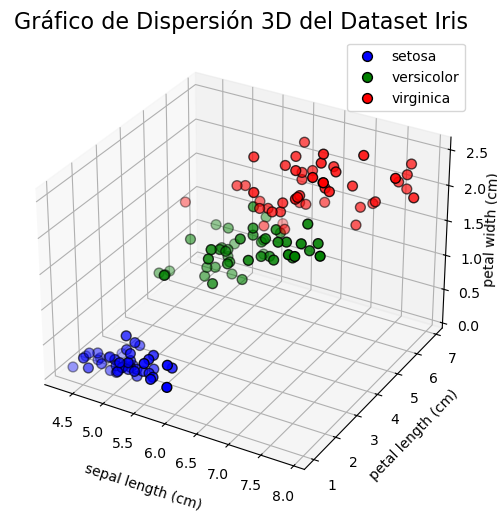

In [29]:
# 1. Importar las bibliotecas necesarias
from mpl_toolkits.mplot3d import Axes3D  # Importación específica para gráficos 3D


# 3. Preparar la figura y los ejes 3D
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

# 4. Definir los colores para cada especie
# Usaremos un mapa de colores para asignar un color a cada clase (0, 1, 2)
colors = ['blue', 'green', 'red']
# También podrías usar un colormap: plt.cm.jet(y / np.max(y))

# 5. Dibujar los puntos para cada especie en un bucle
# Esto nos permite asignar una etiqueta a cada grupo de puntos para la leyenda
for i in range(len(iris.target_names)):
    # Seleccionamos los datos correspondientes a cada clase
    ax.scatter(
        iris.data[iris.target == i, 0],  # Característica 1 en el eje X (sepal length)
        iris.data[iris.target == i, 2],  # Característica 3 en el eje Y (petal length)
        iris.data[iris.target == i, 3],  # Característica 4 en el eje Z (petal width)
        c=colors[i],
        label=iris.target_names[i],
        s=50, # Tamaño del punto
        edgecolor='k' # Color del borde del punto
    )

# 6. Añadir etiquetas a los ejes y un título
ax.set_title("Gráfico de Dispersión 3D del Dataset Iris", fontsize=16)
ax.set_xlabel(iris.feature_names[0], labelpad=10)
ax.set_ylabel(iris.feature_names[2])
ax.set_zlabel(iris.feature_names[3], labelpad=-1)

# 7. Añadir la leyenda
ax.legend()

# 8. Mostrar el gráfico
plt.show()

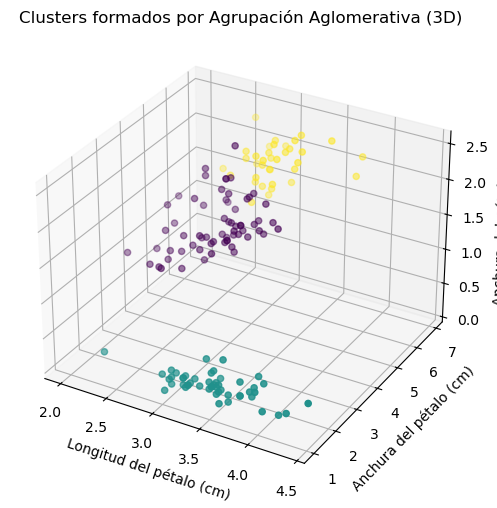

In [30]:
# Aplicando agrupación aglomerativa y visualizando
agglomerative = AgglomerativeClustering(n_clusters=3, linkage='ward')
agglomerative.fit(iris_data)
agglomerative.labels_
labels = agglomerative.labels_
# Visualización de los clusters formados en 3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
# Usar las tres primeras características para el gráfico 3D
ax.scatter(iris_data[:, 1], iris_data[:, 2], iris_data[:, 3], c=labels, cmap='viridis')
ax.set_title('Clusters formados por Agrupación Aglomerativa (3D)')
ax.set_xlabel('Longitud del pétalo (cm)')
ax.set_ylabel('Anchura del pétalo (cm)')
ax.set_zlabel('Anchura del pétalo (cm)')
plt.show()



### Dendrograma

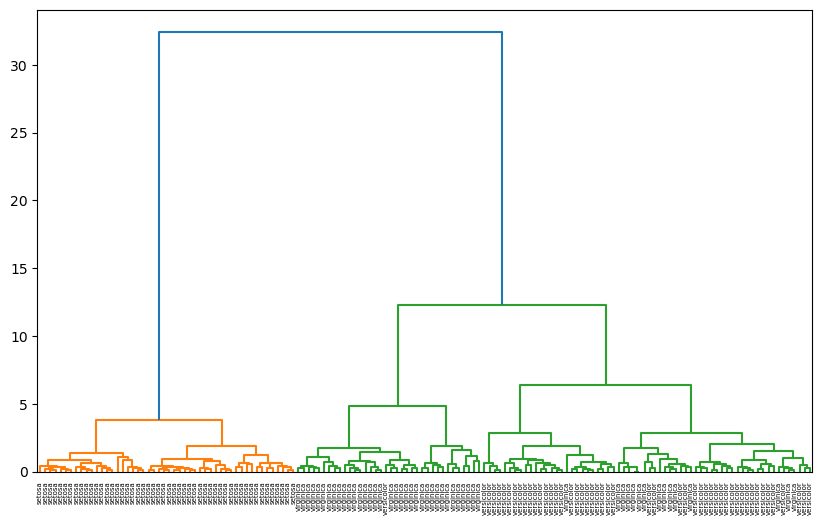

In [31]:
# Dendrograma 
from scipy.cluster.hierarchy import dendrogram, linkage
# Calcular la matriz de enlace
Z = linkage(iris_data, method='ward')
# Crear el dendrograma
plt.figure(figsize=(10, 6))
dendrogram(Z, labels=iris.target_names[iris.target], leaf_rotation=90)
plt.show()

## Comparamos clasificación real con algoritmo de agrupación aglomerativa

In [58]:
import seaborn as sns
df = sns.load_dataset('iris')
X = df.iloc[:, 2:4] # Datos de longitud y anchura del pétalo
# las 3 etiquetas de especies
Y = df['species'] # Etiquetas de las especies

In [64]:
agglo2 = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
agglo2.fit(X) # Usar las características de longitud y anchura del pétalo (2D)


AgglomerativeClustering(n_clusters=3)

In [65]:
# Flores agrupadas en el cluster 0
case0 = Y[agglo2.labels_==0]
print(case0.value_counts())

species
virginica     49
versicolor     5
Name: count, dtype: int64


In [50]:
# flores agrupadas en el cluster 1
case1 = Y[agglo2.labels_==1]
print(case1.value_counts())

species
setosa    50
Name: count, dtype: int64


In [51]:
# Flroes agrupadas en el cluster 2
case2 = Y[agglo2.labels_==2]    
print(case2.value_counts())

species
versicolor    45
virginica      1
Name: count, dtype: int64


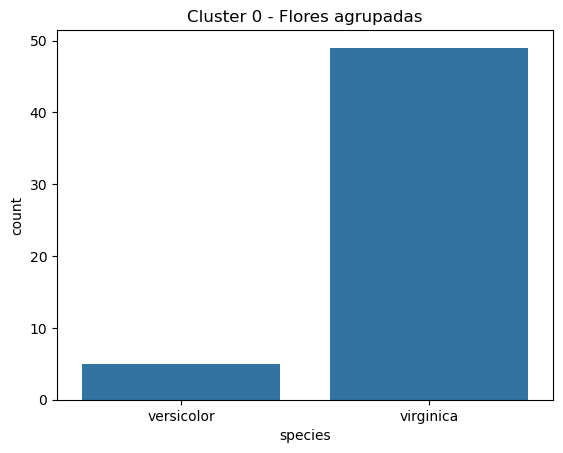

In [56]:
# Mostrar en un gráfico de dispersión los clusters formados
sns.countplot(x=case0).set_title('Cluster 0 - Flores agrupadas')
plt.show()